In [4]:
from tf_unet import unet, util, image_util
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
#import scipy
from scipy import misc
%matplotlib inline

In [5]:
DATA_ROOT = "/Users/cesare.chung/int/01_CODE_UNET/NEW2/"
#
# Training
#
masks_dir = sorted(glob.glob(DATA_ROOT+"/trainData_tftf/resize2/*_manual1_resized_mask.gif"))
imgs_dir  = sorted(glob.glob(DATA_ROOT+"/trainData_tftf/resize2/*_training_resized_training.tif"))

# Import data
print('Loading training dataset...\n')

X_data=[]
for index,entry in enumerate(imgs_dir):
    img = misc.imread(entry)
    X_data.append(img)

Y_data=[]
for index,entry in enumerate(masks_dir):
    img = misc.imread(entry)
    Y_data.append(img)

#
X_data=np.array(X_data)
Y_data=np.array(Y_data)
#

Loading training dataset...



In [6]:
#
masks_Testing = sorted(glob.glob(DATA_ROOT+"/testData_tftf/resize2/*_manual1_resized_mask.gif"))
imgs_Testing  = sorted(glob.glob(DATA_ROOT+"/testData_tftf/resize2/*_test_resized_testing.tif"))

# Import data
print('Loading testing dataset...\n')

X_test=[]
for index,entry in enumerate(imgs_Testing):
    img = misc.imread(entry)
    X_test.append(img)

Y_test=[]
for index,entry in enumerate(masks_Testing):
    img = misc.imread(entry)
    Y_test.append(img)

#
X_test=np.array(X_test)
Y_test=np.array(Y_test)
#

Loading testing dataset...



In [7]:
print("TRAIN data  shape:", X_data.shape)
print("TRAIN label shape:", Y_data.shape)

print("TEST  data  shape:", X_test.shape)
print("TEST  label shape:", Y_test.shape)

TRAIN data  shape: (20, 460, 460, 3)
TRAIN label shape: (20, 460, 460)
TEST  data  shape: (20, 460, 460, 3)
TEST  label shape: (20, 460, 460)


In [8]:
#############################################
# Label                                     #
#############################################

In [9]:
print("TRAIN label shape:", Y_data.shape)
print("TEST  label shape:", Y_test.shape)

TRAIN label shape: (20, 460, 460)
TEST  label shape: (20, 460, 460)


In [10]:
X_data = X_data.reshape(X_data.shape[0], 3, 460, 460)
X_test = X_test.reshape(X_test.shape[0], 3, 460, 460)

/anaconda/envs/py35/lib/python3.5/site-packages/keras/preprocessing/image.py:648: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_first" (channels on axis 1), i.e. expected either 1, 3 or 4 channels on axis 1. However, it was passed an array with shape (20, 1, 460, 460) (1 channels).
  ' (' + str(x.shape[self.channel_axis]) + ' channels).')


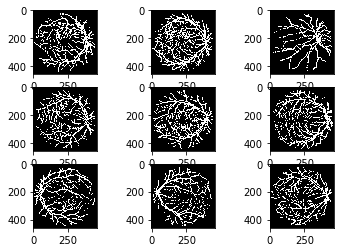

In [14]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
K.set_image_dim_ordering('th')
#
# reshape to be [samples][pixels][width][height]
Y_data = Y_data.reshape(Y_data.shape[0], 1, 460, 460)
Y_test = Y_test.reshape(Y_test.shape[0], 1, 460, 460)
#
Y_data = Y_data.astype(np.bool)
Y_test = Y_test.astype(np.bool)
#
# Standardize images across the dataset, mean=0, stdev=1
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
#
# Random Rotations
datagen = ImageDataGenerator(rotation_range=90)
#
# Random Shifts
shift = 0.9
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
#
# Random Flips
#datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
#
# fit parameters from data
datagen.fit(Y_data)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_data, Y_data, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(y_batch[i].reshape(460,460), cmap=pyplot.get_cmap('gray'))
    # show the plot
    pyplot.show()
    break

In [15]:
print("TRAIN data  shape:", X_data.shape)
print("TRAIN label shape:", Y_data.shape)
print("TEST  data  shape:", X_test.shape)
print("TEST  label shape:", Y_test.shape)

TRAIN data  shape: (20, 3, 460, 460)
TRAIN label shape: (20, 1, 460, 460)
TEST  data  shape: (20, 3, 460, 460)
TEST  label shape: (20, 1, 460, 460)
